# 선호지수 모델링

In [2]:
setwd("D:\\USER\\Desktop\\yangho\\제5회 Big Data Competition-Digital Trend Analyzer")

In [3]:
getwd()

[1] "D:/USER/Desktop/yangho/제5회 Big Data Competition-Digital Trend Analyzer"

In [4]:
library(data.table)

In [5]:
all_product<- fread("all_product.csv",encoding="UTF-8",na.strings=c(""))
new_search1 <- fread("new_search1.csv",encoding="UTF-8")
new_search2 <- fread("new_search2.csv",encoding="UTF-8")real <- CLAC1 %>% select(-CLAC1_NM,-mhit,-mhr,-msale)

library(rpart)
dt_reg<- rpart(n_rate~.,data=real)
summary(dt_reg)

yhat_test <- predict(dt_reg,real)

mse <- mean((yhat_test-real$n_rate)^2)
mse

rmse <- sqrt(mse)
rmse

tmp1 <- printcp(dt_reg)
rsq.val <- 1-tmp1[,c(3,4)]
rsq.val

rsq.rpart(dt_reg)

library(randomForest)
rf_model <- randomForest(n_rate~.,data=real)
rf_model

yhat_test <- predict(rf_model,real)
yhat_test

mse <- mean((yhat_test-real$n_rate)^2)
mse

rmse <- sqrt(mse)
rmse

install.packages("e1071")
library(e1071)
svm_model <- svm(n_rate~.,data=real)
summary(svm_model)

yhat_test <- predict(svm_model,real)
yhat_test

svm_error <- (mean(svm_model$residuals^2))
svm_error

rmse <- sqrt(mse)
rmse

residuals <- real$n_rate-yhat_test
y_test_mean <- mean(real$n_rate)
tss <- sum((real$n_rate-y_test_mean)^2)
rss <- sum(residuals^2)

rsq <- 1-(rss/tss)
rsq

library(tidyverse)
library(caret)
install.packages("xgboost")
library(xgboost)

xgb_model <- train(n_rate~.,data=real,method="xgbTree",eval_metric="rmse")

xgb_model

yhat_test <- predict(xgb_model,real)
mse <- mean((yhat_test-real$n_rate)^2)
mse

rmse <- sqrt(mse)
rmse

residuals <- real$n_rate-yhat_test
y_test_mean <- mean(real$n_rate)
tss <- sum((real$n_rate-y_test_mean)^2)
rss <- sum(residuals^2)

rsq <- 1-(rss/tss)
rsq

str(real_pref)

In [6]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
library(lubridate)
all_products=all_product %>% mutate(Sales=PD_BUY_AM*PD_BUY_CT)
x=as.character(all_product$SESS_DT)
x=as_date(x)
Month=month(x)
Weekday=weekdays(x)
all_products=all_products %>% mutate(Month,Weekday)


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



In [8]:
med_hits=all_products %>% group_by(CLAC1_NM) %>% summarise(mhit=median(HITS_SEQ))   # 상품군별 히트수 중앙값

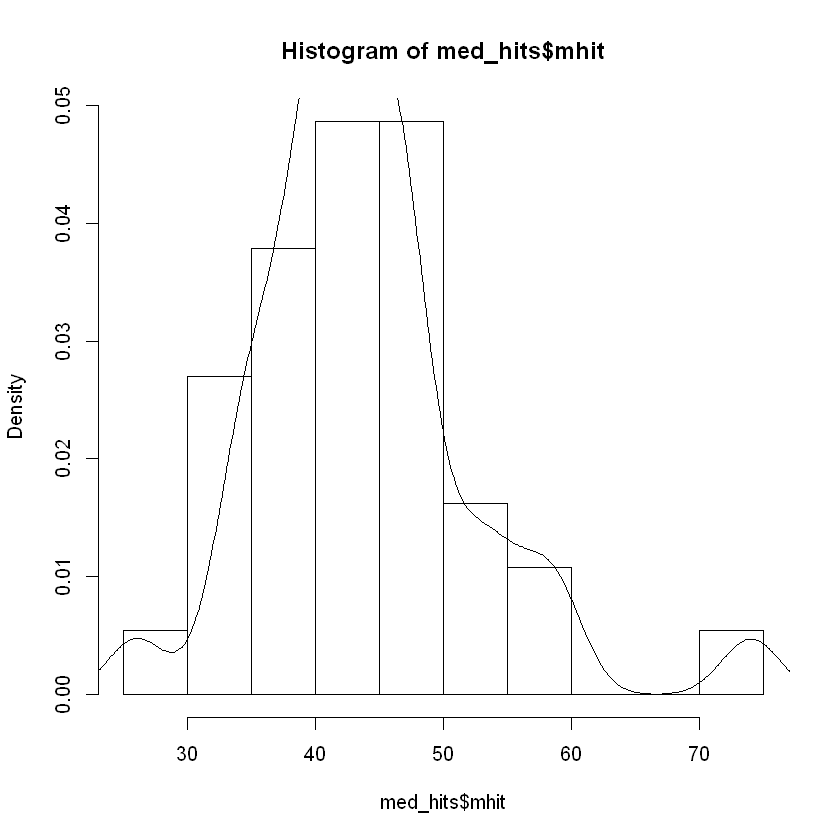

In [9]:
hist(med_hits$mhit,freq=F)
lines(density(med_hits$mhit))

In [10]:
med_hits$sca_mhit=scale(med_hits$mhit)                    # 상품군별 히트수 중앙값 표준화
head(med_hits)

CLAC1_NM,mhit,sca_mhit
가구,40,-0.4575656
건강식품,41,-0.3408075
계절가전,42,-0.2240493
과일,41,-0.3408075
구기/필드스포츠,48,0.4764993
남성의류,58,1.6440804


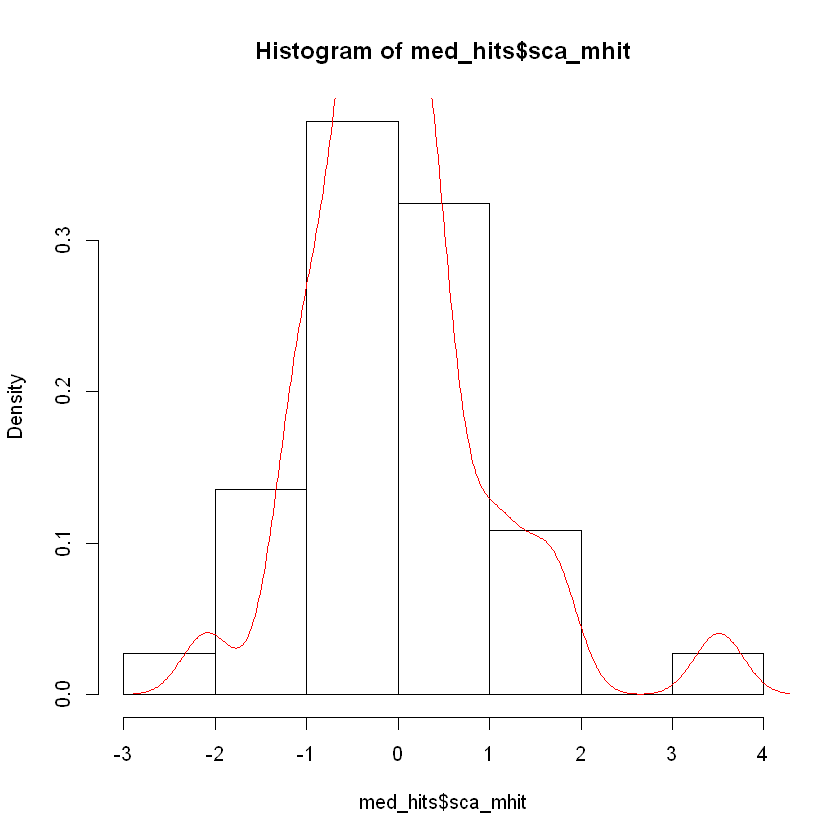

In [11]:
hist(med_hits$sca_mhit,freq=F)
lines(density(med_hits$sca_mhit),col="red")

In [12]:
med_hr=all_products %>% group_by(CLAC1_NM) %>% summarise(mhr=median(TOT_SESS_HR_V))           # 상품군별 세션시간 중앙값

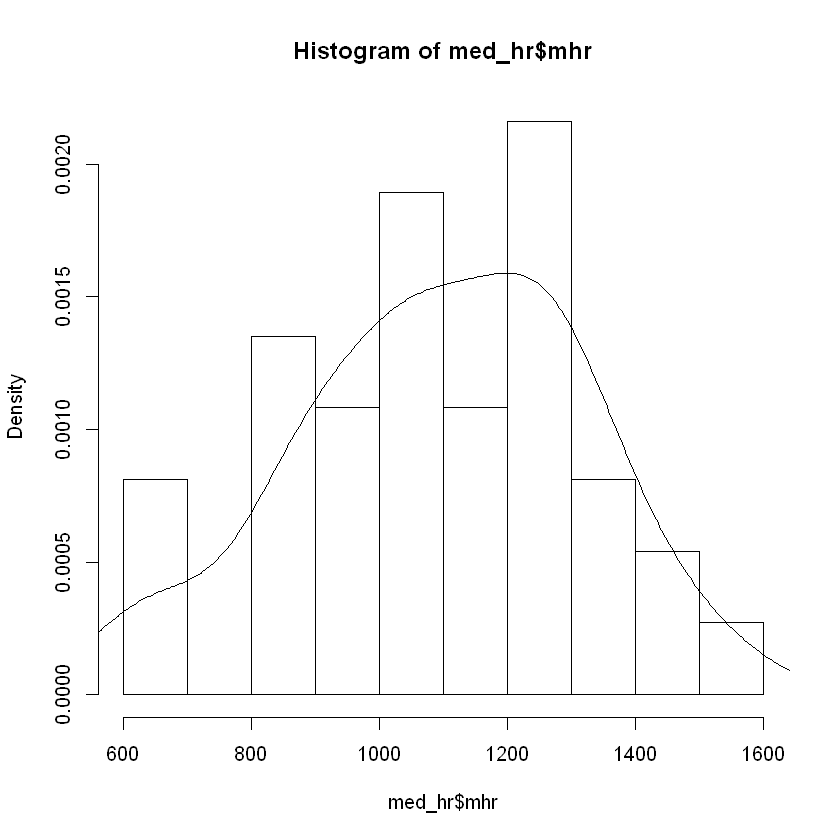

In [13]:
hist(med_hr$mhr,freq=F)
lines(density(med_hr$mhr))

In [14]:
med_hr$sca_mhr=scale(med_hr$mhr)                      # 상품군별 세션시간 중앙값 표준화
head(med_hr)

CLAC1_NM,mhr,sca_mhr
가구,1209.0,0.5072558
건강식품,967.0,-0.5745516
계절가전,1121.5,0.1161064
과일,1072.5,-0.1029372
구기/필드스포츠,1246.0,0.6726561
남성의류,1381.0,1.2761438


In [15]:
med_sales=all_products %>% group_by(CLAC1_NM) %>% summarise(msale=median(Sales))    # 상품군별 sales 중앙값
head(med_sales)

CLAC1_NM,msale
가구,152250
건강식품,56900
계절가전,79500
과일,22900
구기/필드스포츠,27000
남성의류,19000


In [16]:
normalize=function(x) {
    return((x-min(x))/(max(x)-min(x)))
}

In [17]:
med_sales$norm_msale=normalize(med_sales$msale)                      # 상품군별 sales 중앙값 정규화
head(med_sales)

CLAC1_NM,msale,norm_msale
가구,152250,0.18341298
건강식품,56900,0.06350604
계절가전,79500,0.09192656
과일,22900,0.02074950
구기/필드스포츠,27000,0.02590543
남성의류,19000,0.01584507


In [18]:
CLAC1=left_join(med_hits,med_hr,by="CLAC1_NM")
CLAC1=left_join(CLAC1,med_sales,by="CLAC1_NM")
head(CLAC1)

CLAC1_NM,mhit,sca_mhit,mhr,sca_mhr,msale,norm_msale
가구,40,-0.4575656,1209.0,0.5072558,152250,0.18341298
건강식품,41,-0.3408075,967.0,-0.5745516,56900,0.06350604
계절가전,42,-0.2240493,1121.5,0.1161064,79500,0.09192656
과일,41,-0.3408075,1072.5,-0.1029372,22900,0.02074950
구기/필드스포츠,48,0.4764993,1246.0,0.6726561,27000,0.02590543
남성의류,58,1.6440804,1381.0,1.2761438,19000,0.01584507


In [19]:
n_CLAC1=all_products %>% group_by(CLAC1_NM) %>% summarise(n=n())       # 상품군별 구매횟수
n_all=nrow(all_products)          # 상품군 전체 구매횟수

In [20]:
CLAC1_rate=n_CLAC1 %>% group_by(CLAC1_NM) %>% summarise(n_rate=n/n_all)   # 상품군별 구매횟수 / 상품군 전체 구매횟수 = 상품군별 구매횟수비율

In [21]:
head(CLAC1_rate)

CLAC1_NM,n_rate
가구,0.008645485
건강식품,0.024588972
계절가전,0.002761105
과일,0.004995488
구기/필드스포츠,0.006749168
남성의류,0.110452355


In [22]:
CLAC1=left_join(CLAC1,CLAC1_rate,by="CLAC1_NM")
head(CLAC1)

CLAC1_NM,mhit,sca_mhit,mhr,sca_mhr,msale,norm_msale,n_rate
가구,40,-0.4575656,1209.0,0.5072558,152250,0.18341298,0.008645485
건강식품,41,-0.3408075,967.0,-0.5745516,56900,0.06350604,0.024588972
계절가전,42,-0.2240493,1121.5,0.1161064,79500,0.09192656,0.002761105
과일,41,-0.3408075,1072.5,-0.1029372,22900,0.02074950,0.004995488
구기/필드스포츠,48,0.4764993,1246.0,0.6726561,27000,0.02590543,0.006749168
남성의류,58,1.6440804,1381.0,1.2761438,19000,0.01584507,0.110452355


In [23]:
CLAC1_regression=lm(n_rate ~ sca_mhit+sca_mhr+norm_msale,CLAC1)     # 히트수, 세션시간, 판매금액과 구매비율 회귀 
summary(CLAC1_regression)


Call:
lm(formula = n_rate ~ sca_mhit + sca_mhr + norm_msale, data = CLAC1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.061348 -0.012035 -0.008014  0.003656  0.079923 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.025717   0.005428   4.738 3.99e-05 ***
sca_mhit     0.039021   0.009720   4.014 0.000323 ***
sca_mhr     -0.016736   0.009639  -1.736 0.091859 .  
norm_msale   0.016765   0.032277   0.519 0.606946    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02924 on 33 degrees of freedom
Multiple R-squared:  0.4711,	Adjusted R-squared:  0.4231 
F-statistic:   9.8 on 3 and 33 DF,  p-value: 9.033e-05


In [24]:
pref=all_products %>% select(CLAC1_NM,HITS_SEQ,TOT_SESS_HR_V,Sales)

In [25]:
pref$nhit=normalize(pref$HITS_SEQ)
pref$nhr=normalize(pref$TOT_SESS_HR_V)               # 전체 구매데이터에서 쓸 변수 정규화
pref$nsale=normalize(pref$Sales)
head(pref)

CLAC1_NM,HITS_SEQ,TOT_SESS_HR_V,Sales,nhit,nhr,nsale
패션잡화,74,468,38000,0.14457831,0.011899616,0.0009741028
패션잡화,40,366,38000,0.07630522,0.009306110,0.0009741028
패션잡화,284,7098,39900,0.56626506,0.180477510,0.0010228208
패션잡화,284,7098,29900,0.56626506,0.180477510,0.0007664105
음료,8,99,47000,0.01204819,0.002517226,0.0012048721
음료,11,242,92000,0.01807229,0.006153220,0.0023587186


In [26]:
pref$xhit=pref$nhit*0.039021
pref$xhr=pref$nhr*(-0.016736)
pref$xsales=pref$nsale*0.016765
pref$inter=pref$Sales*0+0.025717               # 정규화한 변수에 회귀계수(가중치) 곱하기
head(pref)                                     # 500만개의 데이터가 나온다

CLAC1_NM,HITS_SEQ,TOT_SESS_HR_V,Sales,nhit,nhr,nsale,xhit,xhr,xsales,inter
패션잡화,74,468,38000,0.14457831,0.011899616,0.0009741028,0.0056415904,-0.0001991520,1.633083e-05,0.025717
패션잡화,40,366,38000,0.07630522,0.009306110,0.0009741028,0.0029775060,-0.0001557471,1.633083e-05,0.025717
패션잡화,284,7098,39900,0.56626506,0.180477510,0.0010228208,0.0220962289,-0.0030204716,1.714759e-05,0.025717
패션잡화,284,7098,29900,0.56626506,0.180477510,0.0007664105,0.0220962289,-0.0030204716,1.284887e-05,0.025717
음료,8,99,47000,0.01204819,0.002517226,0.0012048721,0.0004701325,-0.0000421283,2.019968e-05,0.025717
음료,11,242,92000,0.01807229,0.006153220,0.0023587186,0.0007051988,-0.0001029803,3.954392e-05,0.025717


In [27]:
real_pref=pref %>% mutate(y=xhit+xhr+xsales+inter)       # 계수 곱해준 변수들 더하기
head(real_pref)

CLAC1_NM,HITS_SEQ,TOT_SESS_HR_V,Sales,nhit,nhr,nsale,xhit,xhr,xsales,inter,y
패션잡화,74,468,38000,0.14457831,0.011899616,0.0009741028,0.0056415904,-0.0001991520,1.633083e-05,0.025717,0.03117577
패션잡화,40,366,38000,0.07630522,0.009306110,0.0009741028,0.0029775060,-0.0001557471,1.633083e-05,0.025717,0.02855509
패션잡화,284,7098,39900,0.56626506,0.180477510,0.0010228208,0.0220962289,-0.0030204716,1.714759e-05,0.025717,0.04480990
패션잡화,284,7098,29900,0.56626506,0.180477510,0.0007664105,0.0220962289,-0.0030204716,1.284887e-05,0.025717,0.04480561
음료,8,99,47000,0.01204819,0.002517226,0.0012048721,0.0004701325,-0.0000421283,2.019968e-05,0.025717,0.02616520
음료,11,242,92000,0.01807229,0.006153220,0.0023587186,0.0007051988,-0.0001029803,3.954392e-05,0.025717,0.02635876


In [28]:
real_pref$y=real_pref$y*10

In [29]:
pm_norm=function(x) {
    return((x - (min(x)-0.01))/((max(x)+0.01) - (min(x)-0.01)))
}    # 비율화?

In [30]:
real_pref$f_y=pm_norm(real_pref$y)         # 구매상품당 선호지수

In [31]:
# hist(real_pref$f_y)

In [32]:
CLAC1_pref=real_pref %>% group_by(CLAC1_NM) %>% summarise(my=mean(f_y))       # 구매상품당 선호지수를 상품군별로 평균구하기

In [33]:
p_pref=pm_norm(CLAC1_pref$my)
min(p_pref);max(p_pref)

[1] 0.08877809

[1] 0.9112219

In [34]:
CLAC1_pref$my=p_pref
CLAC1_pref %>% arrange(desc(my))   # 상품군별 6개월간의 행동 기반 온라인 선호지수

CLAC1_NM,my
유아동의류,0.91122191
여성의류,0.74130164
남성의류,0.70221629
속옷/양말/홈웨어,0.61816427
스포츠패션,0.61228469
시즌스포츠,0.61006257
패션잡화,0.54010086
구기/필드스포츠,0.50185574
헬스/피트니스,0.49020573
문구/사무용품,0.47780437


In [35]:
min(real_pref$f_y);max(real_pref$f_y);mean(real_pref$f_y)

[1] 0.01764964

[1] 0.9823504

[1] 0.3874374

In [36]:
real <- CLAC1 %>% select(-CLAC1_NM,-mhit,-mhr,-msale)

In [37]:
library(rpart)
dt_reg<- rpart(n_rate~.,data=real)
summary(dt_reg)

Call:
rpart(formula = n_rate ~ ., data = real)
  n= 37 

          CP nsplit rel error    xerror      xstd
1 0.63593500      0 1.0000000 1.0989136 0.3251162
2 0.02217781      1 0.3640650 0.6718884 0.2528685
3 0.01000000      2 0.3418872 0.7217193 0.2499875

Variable importance
  sca_mhit    sca_mhr norm_msale 
        75         24          1 

Node number 1: 37 observations,    complexity param=0.635935
  mean=0.02702703, MSE=0.001441438 
  left son=2 (30 obs) right son=3 (7 obs)
  Primary splits:
      sca_mhit   < 0.5348784   to the left,  improve=0.63593500, (0 missing)
      sca_mhr    < 0.6883021   to the left,  improve=0.21496310, (0 missing)
      norm_msale < 0.05740694  to the right, improve=0.06646133, (0 missing)
  Surrogate splits:
      sca_mhr < 0.6883021   to the left,  agree=0.865, adj=0.286, (0 split)

Node number 2: 30 observations,    complexity param=0.02217781
  mean=0.01240213, MSE=0.0004117975 
  left son=4 (18 obs) right son=5 (12 obs)
  Primary splits:
      s

In [38]:
yhat_test <- predict(dt_reg,real)

In [39]:
mse <- mean((yhat_test-real$n_rate)^2)
mse

[1] 0.0004928091

In [40]:
rmse <- sqrt(mse)
rmse

[1] 0.0221993

In [41]:
tmp1 <- printcp(dt_reg)
rsq.val <- 1-tmp1[,c(3,4)]
rsq.val


Regression tree:
rpart(formula = n_rate ~ ., data = real)

Variables actually used in tree construction:
[1] sca_mhit sca_mhr 

Root node error: 0.053333/37 = 0.0014414

n= 37 

        CP nsplit rel error  xerror    xstd
1 0.635935      0   1.00000 1.09891 0.32512
2 0.022178      1   0.36406 0.67189 0.25287
3 0.010000      2   0.34189 0.72172 0.24999


,rel error,xerror
1,0.0000000,-0.09891357
2,0.6359350,0.32811162
3,0.6581128,0.27828071



Regression tree:
rpart(formula = n_rate ~ ., data = real)

Variables actually used in tree construction:
[1] sca_mhit sca_mhr 

Root node error: 0.053333/37 = 0.0014414

n= 37 

        CP nsplit rel error  xerror    xstd
1 0.635935      0   1.00000 1.09891 0.32512
2 0.022178      1   0.36406 0.67189 0.25287
3 0.010000      2   0.34189 0.72172 0.24999


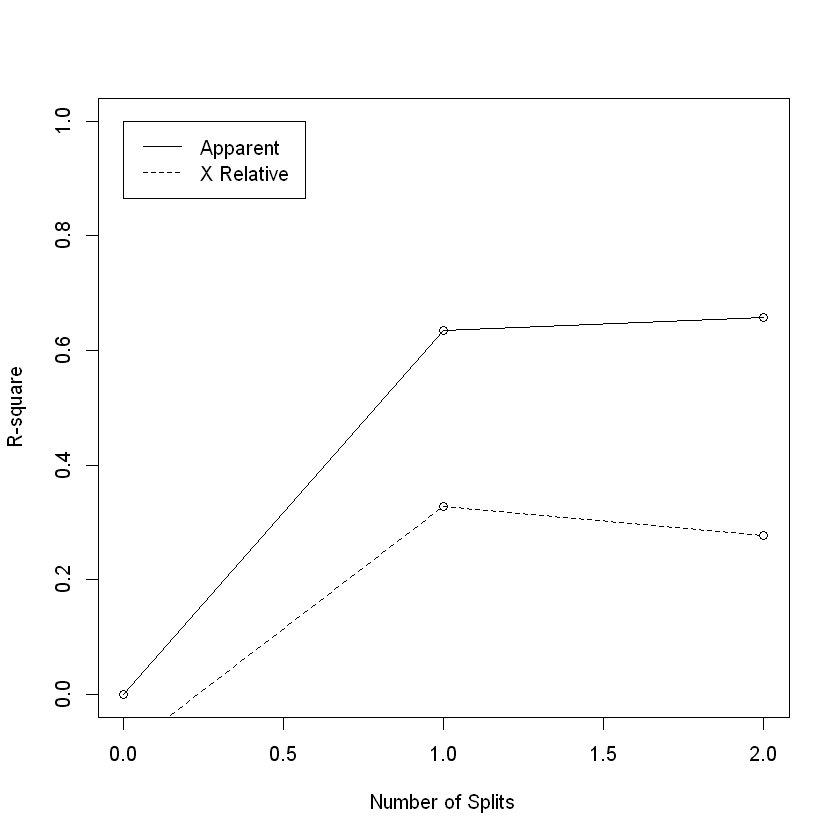

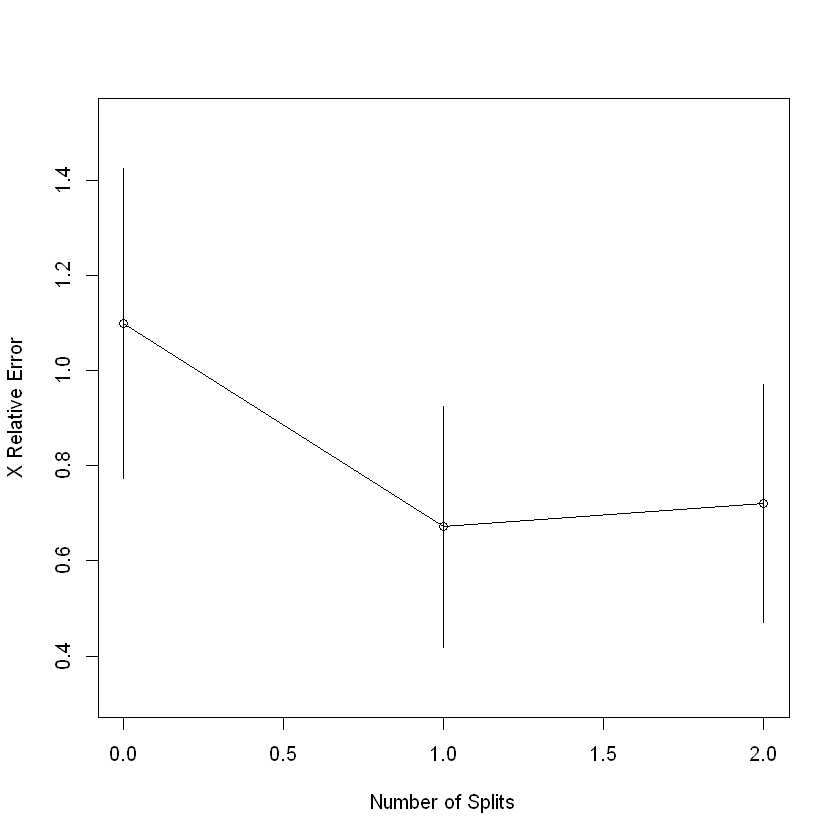

In [42]:
rsq.rpart(dt_reg)

In [43]:
library(randomForest)
rf_model <- randomForest(n_rate~.,data=real)
rf_model

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine




Call:
 randomForest(formula = n_rate ~ ., data = real) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.0009514318
                    % Var explained: 33.99

In [44]:
yhat_test <- predict(rf_model,real)
yhat_test

1           2           3           4           5           6 
0.009619940 0.033452399 0.011907356 0.008706583 0.016240266 0.087791162 
          7           8           9          10          11          12 
0.009240225 0.009598928 0.005964668 0.007870847 0.013691748 0.005831217 
         13          14          15          16          17          18 
0.010112322 0.008899869 0.072388383 0.077090286 0.062373173 0.017173739 
         19          20          21          22          23          24 
0.026370177 0.095632359 0.009851653 0.010993237 0.018172586 0.079967197 
         25          26          27          28          29          30 
0.009106187 0.029816754 0.003828570 0.014150467 0.011387477 0.013584012 
         31          32          33          34          35          36 
0.019910312 0.014407378 0.017215891 0.065997677 0.020094826 0.008511020 
         37 
0.065341168

In [45]:
mse <- mean((yhat_test-real$n_rate)^2)
mse

[1] 0.0002589743

In [46]:
rmse <- sqrt(mse)
rmse

[1] 0.01609268

In [51]:
if(!require("e1071"))(install.packages("e1071"))
library(e1071)
svm_model <- svm(n_rate~.,data=real)
summary(svm_model)

Loading required package: e1071
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'e1071'"Installing package into 'D:/USER/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"


The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp8EB9tH\downloaded_packages


NULL

ERROR: Error in library(e1071): there is no package called 'e1071'


In [ ]:
yhat_test <- predict(svm_model,real)
yhat_test

In [ ]:
svm_error <- (mean(svm_model$residuals^2))
svm_error

In [ ]:
rmse <- sqrt(mse)
rmse

In [ ]:
residuals <- real$n_rate-yhat_test
y_test_mean <- mean(real$n_rate)
tss <- sum((real$n_rate-y_test_mean)^2)
rss <- sum(residuals^2)

rsq <- 1-(rss/tss)
rsq

In [ ]:
library(tidyverse)
library(caret)
install.packages("xgboost")
library(xgboost)

In [ ]:
xgb_model <- train(n_rate~.,data=real,method="xgbTree",eval_metric="rmse")

In [ ]:
xgb_model

In [ ]:
yhat_test <- predict(xgb_model,real)
mse <- mean((yhat_test-real$n_rate)^2)
mse

In [ ]:
rmse <- sqrt(mse)
rmse

In [ ]:
residuals <- real$n_rate-yhat_test
y_test_mean <- mean(real$n_rate)
tss <- sum((real$n_rate-y_test_mean)^2)
rss <- sum(residuals^2)

rsq <- 1-(rss/tss)
rsq

In [ ]:
str(real_pref)